In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import joblib


2024-11-24 02:46:09.588357: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732398369.639225   60244 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732398369.652606   60244 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 02:46:09.753189: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
stocks = ['AAPL', 'GME', 'MCD', 'MSFT', 'NFLX', 'NVDA', 'TSLA']

In [3]:
feature_cols = [
    'LogReturn_Close', 'LogReturn_Volume', 
    'positive_ratio', 'negative_ratio', 'neutral_ratio'
]

In [4]:
dataframes=[pd.read_pickle(os.path.join('all_ratio',f'{stock}_ratio.pkl')) for stock in stocks]

In [5]:
for i,df in enumerate(dataframes):
    df.fillna(0.333333, inplace=True)
    df['LogReturn_Close'] = np.log(df['Close'] / df['Close'].shift(1))
    df['LogReturn_Volume'] = np.log(df['Volume'] / df['Volume'].shift(1))
    df=df.dropna()
    df= df.drop(columns=['Close','Volume','Open','High','Low'])
    df.insert(0, 'Stock', f"Stock_{i}")
    dataframes[i]=df

In [6]:
dataframes[0]

,Stock,Date,positive_ratio,negative_ratio,neutral_ratio,LogReturn_Close,LogReturn_Volume
1,Stock_0,2018-01-03,0.0,0.0,1.0,-0.000174,0.144129
2,Stock_0,2018-01-04,0.0,0.0,1.0,0.004634,-0.274392
3,Stock_0,2018-01-05,0.0,0.0,1.0,0.011321,0.053181
4,Stock_0,2018-01-08,0.0,0.0,1.0,-0.003721,-0.140059
5,Stock_0,2018-01-09,0.0,0.0,1.0,-0.000115,0.048226
...,...,...,...,...,...,...,...
1254,Stock_0,2022-12-23,0.0,0.0,1.0,-0.002802,-0.198824
1255,Stock_0,2022-12-27,0.0,0.0,1.0,-0.013975,0.078233
1256,Stock_0,2022-12-28,0.0,0.0,1.0,-0.031166,0.213576
1257,Stock_0,2022-12-29,0.0,0.0,1.0,0.027931,-0.120969


In [7]:
combined_df = pd.concat(dataframes,ignore_index=True)
combined_df

,Stock,Date,positive_ratio,negative_ratio,neutral_ratio,LogReturn_Close,LogReturn_Volume
0,Stock_0,2018-01-03,0.000000,0.000000,1.000000,-0.000174,0.144129
1,Stock_0,2018-01-04,0.000000,0.000000,1.000000,0.004634,-0.274392
2,Stock_0,2018-01-05,0.000000,0.000000,1.000000,0.011321,0.053181
3,Stock_0,2018-01-08,0.000000,0.000000,1.000000,-0.003721,-0.140059
4,Stock_0,2018-01-09,0.000000,0.000000,1.000000,-0.000115,0.048226
...,...,...,...,...,...,...,...
8801,Stock_6,2022-12-23,0.015873,0.000000,0.984127,-0.017707,-0.229605
8802,Stock_6,2022-12-27,0.006410,0.006410,0.987179,-0.121138,0.222694
8803,Stock_6,2022-12-28,0.011050,0.005525,0.983425,0.032553,0.057855
8804,Stock_6,2022-12-29,0.008000,0.000000,0.992000,0.077726,0.003850


In [8]:
scaler=StandardScaler()

In [9]:
combined_df[feature_cols] = scaler.fit_transform(combined_df[feature_cols])
combined_df

,Stock,Date,positive_ratio,negative_ratio,neutral_ratio,LogReturn_Close,LogReturn_Volume
0,Stock_0,2018-01-03,-0.226435,-0.198479,0.221398,-0.025315,0.401321
1,Stock_0,2018-01-04,-0.226435,-0.198479,0.221398,0.092928,-0.762073
2,Stock_0,2018-01-05,-0.226435,-0.198479,0.221398,0.257369,0.148509
3,Stock_0,2018-01-08,-0.226435,-0.198479,0.221398,-0.112537,-0.388656
4,Stock_0,2018-01-09,-0.226435,-0.198479,0.221398,-0.023857,0.134732
...,...,...,...,...,...,...,...
8801,Stock_6,2022-12-23,0.045913,-0.198479,0.075629,-0.456465,-0.637574
8802,Stock_6,2022-12-27,-0.116448,-0.081875,0.103662,-2.999997,0.619716
8803,Stock_6,2022-12-28,-0.036844,-0.097980,0.069186,0.779500,0.161500
8804,Stock_6,2022-12-29,-0.089171,-0.198479,0.147931,1.890373,0.011379


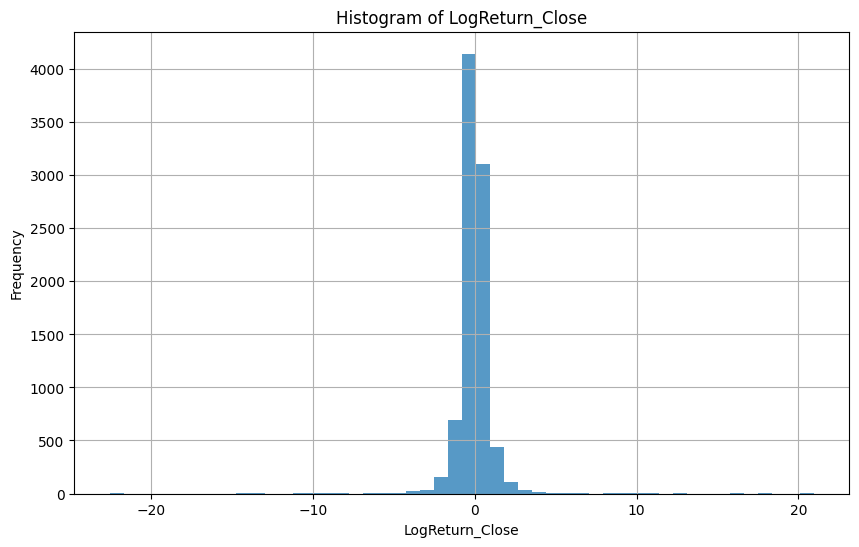

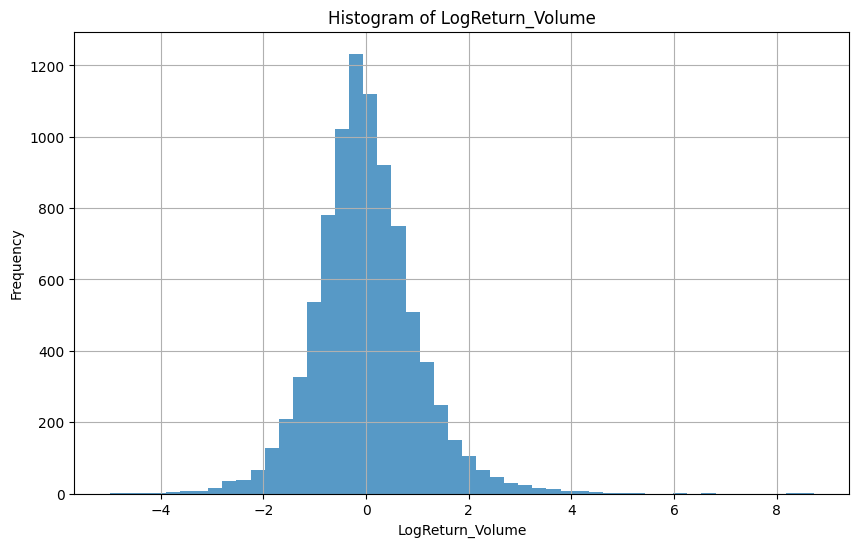

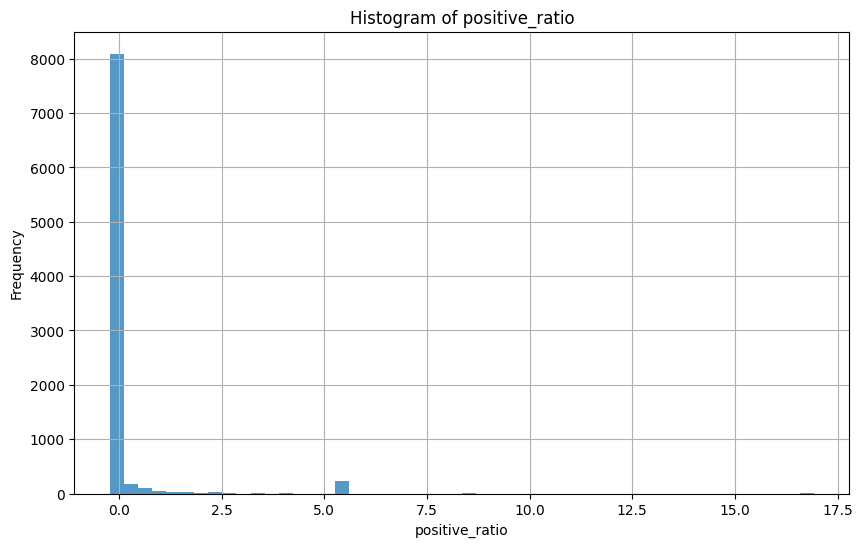

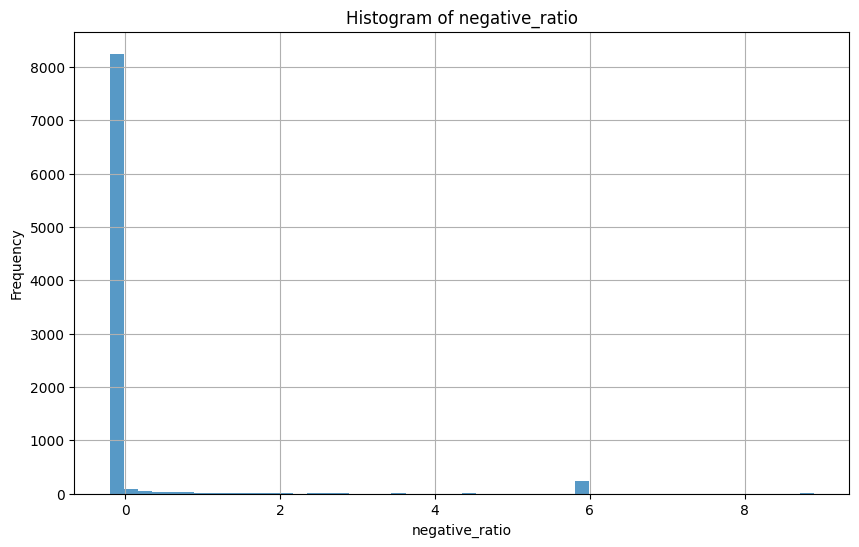

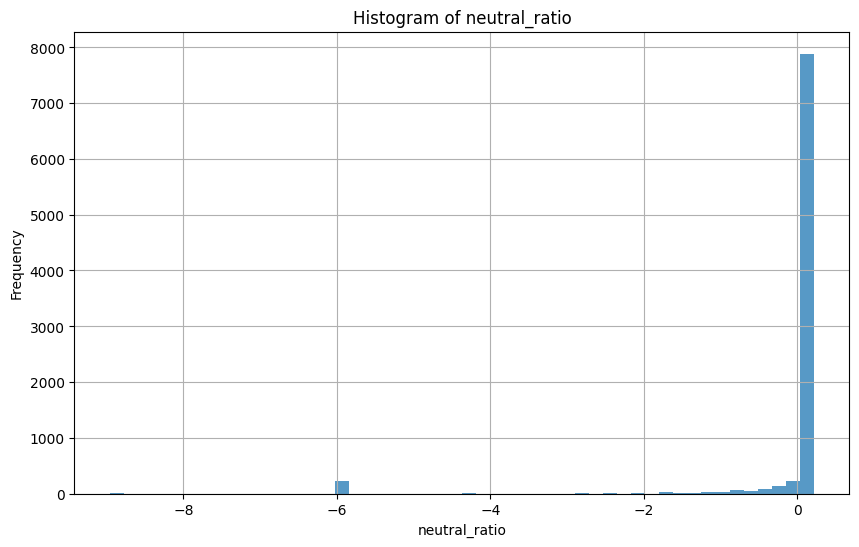

In [10]:
for col in feature_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(combined_df[col], bins=50, alpha=0.75)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [11]:
sequence_length = 20
X, y, stock_labels = [], [], []

In [12]:
for stock, group in combined_df.groupby('Stock'):
    group = group.sort_values(by='Date').reset_index(drop=True)
    
    # Ensure we have enough data for at least one sequence
    if len(group) > sequence_length + 1:
        for i in range(len(group) - sequence_length ):
            # Prepare input features
            input_sequence = group[feature_cols].iloc[i:i + sequence_length].values
            X.append(input_sequence)
            
            # Use the pre-computed log return of the day after the sequence
            target = group['LogReturn_Close'].iloc[i + sequence_length]
            y.append(target)
            
            # Track the stock label for each sequence
            stock_labels.append(stock)

In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}, Number of sequences: {len(stock_labels)}")

Shape of X: (8666, 20, 5), Shape of y: (8666,), Number of sequences: 8666


In [15]:
np.save(os.path.join('all_ratio', 'ratio_X.npy'), X)
np.save(os.path.join('all_ratio', 'ratio_y.npy'), y)

In [16]:
joblib.dump(scaler, os.path.join('all_ratio', 'ratio_scaler.joblib'))

['all_ratio/ratio_scaler.joblib']